# Part 1 -- k-means clustering algorithm

K-Means algorithm partitions a dataset of n points into k disjoint clusters; each cluster is identified by a centroid which changes its position during the learning; each point belongs to the cluster whose centroid is nearest to it.

You will implement the algorithm step by step following the instructions below

##  1. Import the required modules

In python, many utilities (specialised functions) are packed into different modules that have to be explicitly imported

We will import the following:
* `numpy`: containts functions which helps to represent matrices as in Matlab and to perform operations with them
* `pandas`: data structures & analysis
* `matplotlib`: library for creating plots
* `scipy`: fundamental library for scientific computing

These are all the modules you will need for this lab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 

%matplotlib inline

##  2. Load and visualise the data
We can load the data using the module `read_csv` in pandas. You can access to the pandas modules using `pd` followed by a dot as shown below.
Load the file located at `data/myData.csv`

In [2]:
X = # Your code here

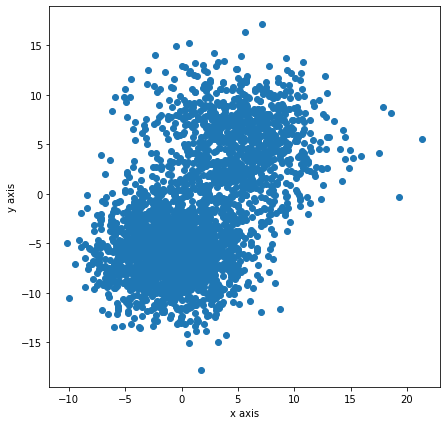

In [3]:
plt.figure(figsize=(7,7))
plt.scatter(X[:,0], X[:,1]) # in python, vectors and matrices are indexed from 0
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.show()

### 2.1. Clusters visualisation

In [4]:
def plot_clusters(X, clusters, centroids):
    """
    This function plots a 2D dataset with colors depending on the clusters.
    Centroids will be marked with a red diamond
    
    Parameters
    ----------
    X : ndarray
        A dataset with shape (N, 2),
        where N is the number of points that will be plotted
    clusters : ndarray
        A ndarray with shape (N,) that indicates to which cluster
        each of the N points in X belong. Elements of this array
        should be integers, for example, if there are 2 clusters
        
        [0,0,0,1,1,1,0,1]
        
        indicates which points belong to clusters 0 and 1 respectively.
    centroids : ndarray
        A ndarray of shape (k,2) containing the locations of the centroids
        of each cluster, where k is the number of clusters.
        
    """
    # Your code here

you can use the cell below to test your code by assigning datapoints in X to clusters at random

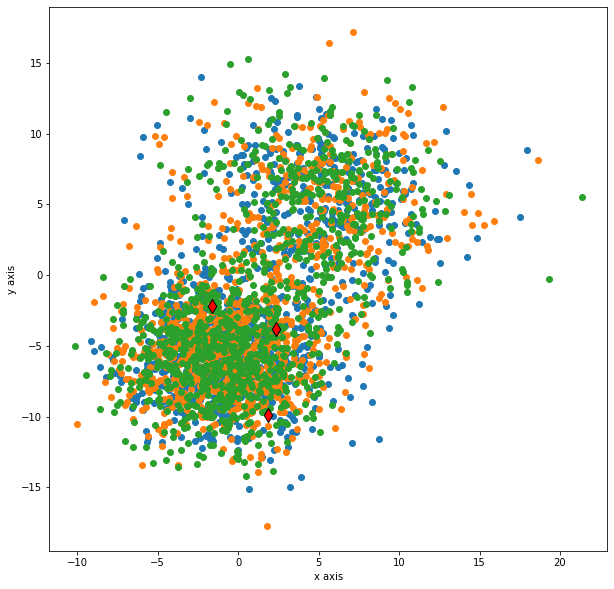

In [5]:
random_clusters = np.random.choice([0,1,2], size=X.shape[0])
random_centroids = X[np.random.choice(X.shape[0], size=3)]
plot_clusters(X, random_clusters, random_centroids)

## 3. Implement the k-means algorithm

We define some of the steps as functions for convenience (they'll be used in a loop)

### 3.1. Step 1: random initialization of the centroids from the data

Select k points at random from the dataset as initial centroids

**HINT**: look at [`np.random.randint`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)

In [6]:
def initial_centroids(X, k):
    '''
    returns k centroids chosen at random
    
    Parameters
    ----------
    X : numpy array with shape (3000, 2)
        matrix with data points from which to select the centroids
    k : int
        number of centroids to be selected
        
    Returns
    -------
    numpy matrix with shape (k, 2) 
    '''
    # Your code here

### 3.2. Step 2: Compute the Euclidean distances between the data points and the centroids

**HINT**: look at [`cdist`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.cdist.html#scipy.spatial.distance.cdist) which is already imported

In [7]:
def distances(X, centroids):
    '''
    returns the euclidean distances between the datapoints and the centroids
    
    Parameters
    ----------
    X : numpy array with shape (3000, 2)
        data points
    centroids: numpy array
    
    Returns
    -------
    numpy matrix with shape (3000, 2) 
    '''
    # Your code here

### 3.3. Step 3: Assign each point to the centroid which is closest to it

**HINT**: look at [`np.argmin`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmin.html) 

In [8]:
def assign_data_point(d):
    '''
    return each point assignment
    
    Parameters
    ----------
    d : numpy array with shape (3000, k)
        a matrix that contains the distances between the datapoints
        and the centroids
        
    Returns
    -------
    numpy matrix with shape (3000,) 
    '''
    # Your code here

### 3.4. Step 4: Update each of the K centroids by moving it to the mean of  the points which were assigned to it

In [9]:
def update_centroids(X, clusters, k):
    '''
    returns a new set of centroids
    
    Parameters
    ----------
    X : numpy array with shape (3000, 2)
        matrix with data points from which to select the centroids
    clusters: numpy array with shape (3000,)
        matrix containing the cluster assignment for each point
        
    Returns
    -------
    ndarray 
        the updated centroids
    '''
    # Your code here

### 3.4. Step 5: Loop Steps 2 to 4 

**Stopping criteria**: when the position of the centroids does not change between two consecutive iterations    

In [10]:
k = 4 # set a value for the number of clusters
centroids = # Your code here
oldcentroids = np.zeros((k,2))
print(f'initial centroids:\n{centroids}')
iters = 0

while (centroids != oldcentroids).any():    
    # Your code here
    
print(f'final centroids:\n{centroids}')
print('number of iterations for convergence', iters)

initial centroids:
[[-1.1054   -6.9824  ]
 [ 0.060369 -2.0453  ]
 [ 7.9292    0.74456 ]
 [ 6.2669    1.4923  ]]
final centroids:
[[ 0.56446084 -7.68830841]
 [-2.92868097 -4.05381975]
 [ 6.52065216  1.95647032]
 [ 3.95053051  7.93373653]]
number of iterations for convergence 49


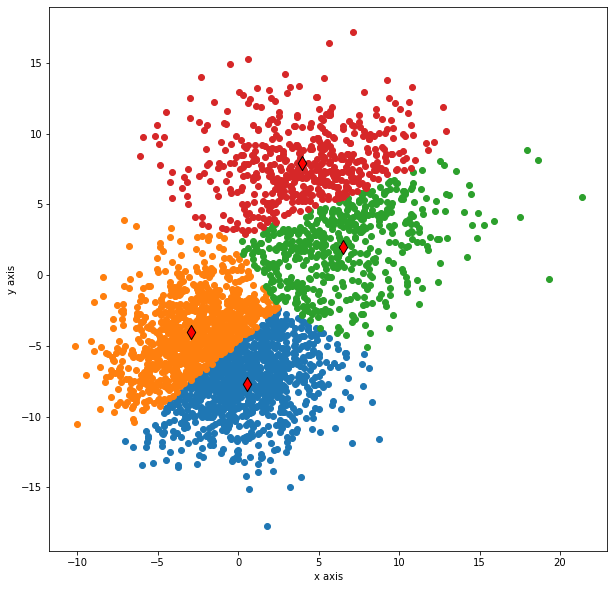

In [11]:
plot_clusters(X, clusters, centroids)

## Compare your results with the scikit-learn implementation of KMeans

* import the k-means implementation
* fit X with the same value of k as you used before
* plot the clusters
* compare the centroids by making a plot of only the centroid from both implementations

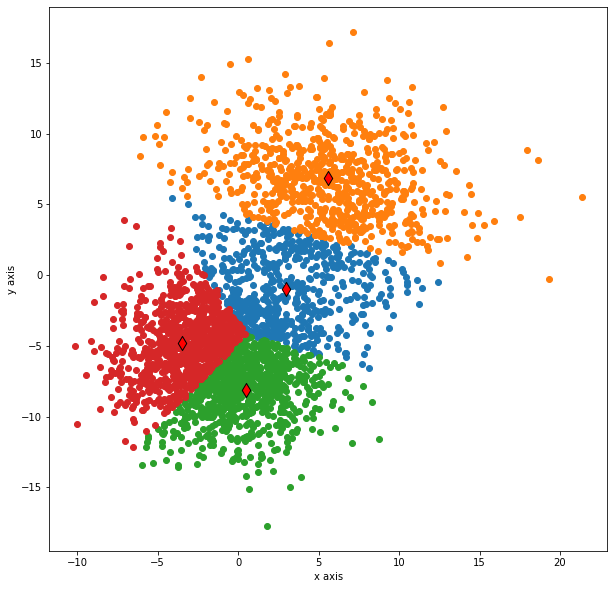

In [12]:
# Your code here

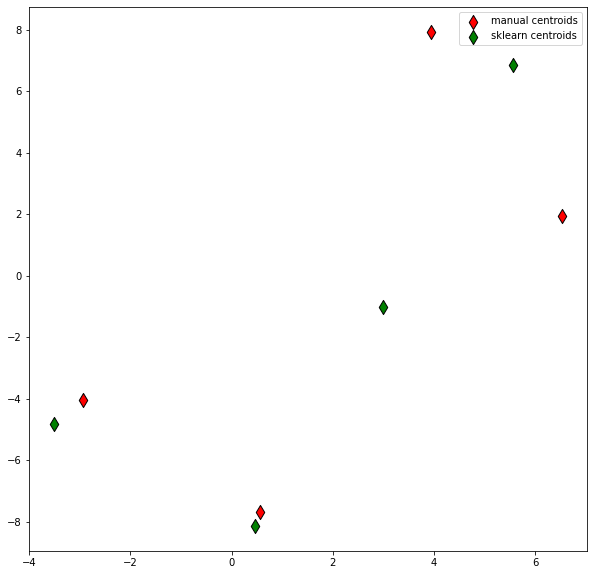

In [13]:
# Your code here

# Part 2 -- Agglomerative Clustering

In this lab, you will learn how to work with a dataset that lies in a manifold and the structure of the data is not easy to handle linearly.


In [14]:
import time as time
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_swiss_roll

To begin, we generate a small dataset with 1500 points, that are distributed in a spiral, it's commonly known as a "swiss roll dataset".
Here we will use 3 dimensions to be able to visualise the data, but remember that in real datasets the dimensionality is usually way higher.

In [15]:
# Generate data (swiss roll dataset)
n_samples = 1500
noise = 0.05
X, _ = make_swiss_roll(n_samples, noise=noise)
# Make it thinner
X[:, 1] *= .5

let's look at the structure of the dataset. With the `shape` property, we can see the dimensionality of the data (as expected, 1500 datapoints in 3 dimensions)

In [16]:
X.shape

(1500, 3)

Now, let's plot the dataset in 3D. You can see how the dataset is distributed in a spiral.

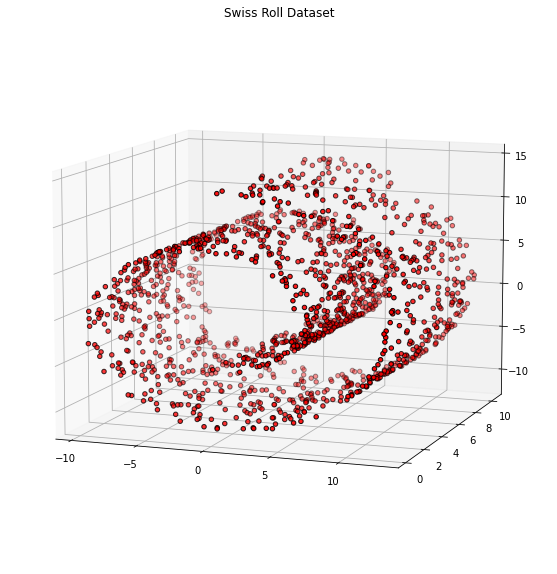

In [17]:
# Your code here

## Agglomerative Clustering

To attempt and describe the dataset, we'll use a hierarchical clustering, implemented through the [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) class from sciki-learn, and you'll see how different types of linkages structure the same data differently.

### Exercise 1.

In the cell below, I provide example code to run the hierarchical clustering $(n=6)$ on our swiss roll dataset, using a single linkage, meaning that datapoints will be included in the closest cluster, as determined by a distance. By default, scikit-learn is configured with the euclidean distance (see the `affinity` parameter in the documentation). I encourage you to copy the code below into a new cell and see how other affinities produce different results.

You will see that this linkage does not capture the structure of the data very well. Ideally, we would like to see clusters coming one after the other in the "ribbon" of datapoints that is rolled into a spiral.

Your task for this exercise is to change the `linkage` parameter from `single` to a linkage that instead of minimising the **distance**, minimises the **variance** of the clusters being merged.

I also provide a utility function: `plot_3d_clusters`, that you can use throughout the lab to visualise your clusters.

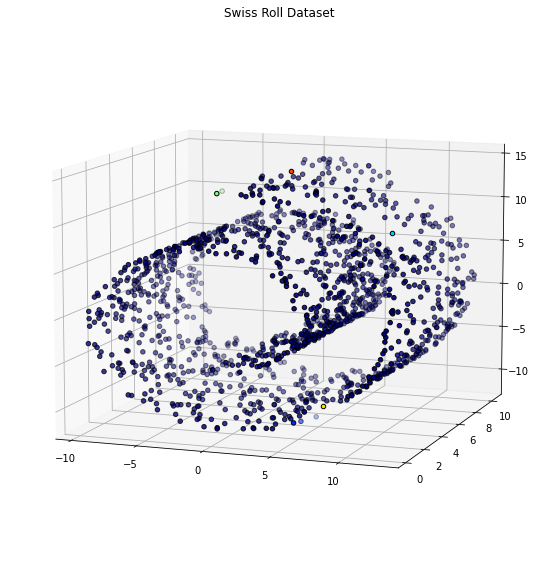

In [18]:
# this is a utility function that you can use to visualise the generated clusters.
def plot_clusters(labels):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(10, -70)
    for l in np.unique(labels):
        ax.scatter(X[labels == l, 0], 
                   X[labels == l, 1], 
                   X[labels == l, 2],
                   color=plt.cm.jet(float(l) / np.max(labels + 1)),
                   s=20, edgecolor='k')
    plt.title('Swiss Roll Dataset')
    plt.show()
    plt.close('all')

# in a single line, we create the AgglomerativeClustering using a single linkage, 
# then we fit it to using our generated datapoints
single_linkage = AgglomerativeClustering(n_clusters=6, linkage='single').fit(X)
# we extract the labels (assgined clusters) corresponding to each of the datapoints
single_linkage_labels = single_linkage.labels_

# visualise the clusters
plot_clusters(single_linkage_labels)

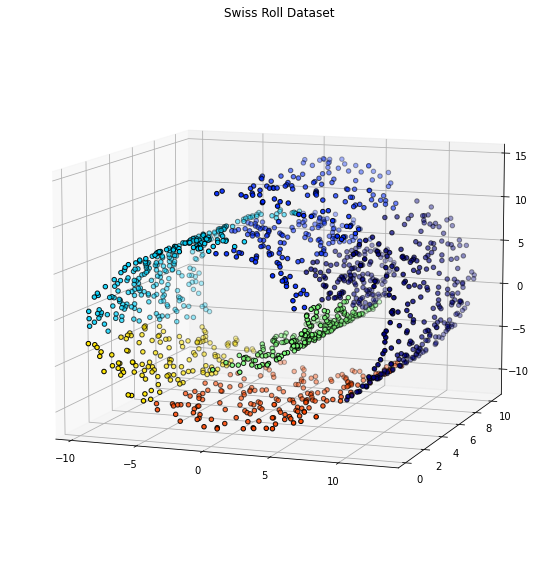

In [19]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined in the previous cell 
# to visualise your results, you don't have to redefine it.

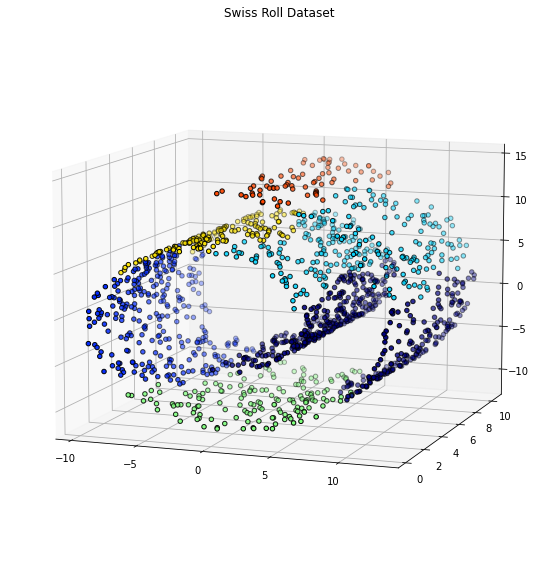

In [20]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined in the previous cell 
# to visualise your results, you don't have to redefine it.

You should have seen better results with the new linkage option. However, you can probably tell that the clustering is still far from our ideal outcome. With any of the options in the `linkage` parameter, we are getting clusters that don't follow the ribbon, and instead assing to the same cluster datapoints that lie far away from each other if you were to unroll the spiral flat.

To achieve this, we can add a connectivity matrix that will provide and go from an unstructured hierarchical clustering to a structured one.

### Exercise 2

In this case, your task will be to set the `connectivity` parameter of the `AgglomerativeClustering`. This time, however, you don't have all the options listed in the documentation, since you can set this parameter to an arbitraty connectivity matrix, or a function that will transform the data and produce the connectivity matrix itself.

You can start by reading the documentation of [`RadiusNeighborsTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsTransformer.html), a class that transforms a dataset into a weighted graph of neighbours nearest than a radius. An alternative to this, is to use the k-nearest neighbours class [`KNeighborsTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsTransformer.html). Using these classes, you would extract a connectivity matrix (the weighted graph between the datapoints), and use that graph as to set the `connectivity` parameter of `AgglomerativeClustering`.

Tips: 
* scikit-learn provides helper functions for several classes that implement common transformations to datasets. Read the linked documentation an d try to find these helper functions to simplify your solution.
* Remember to import the classes and methods that you want to use.

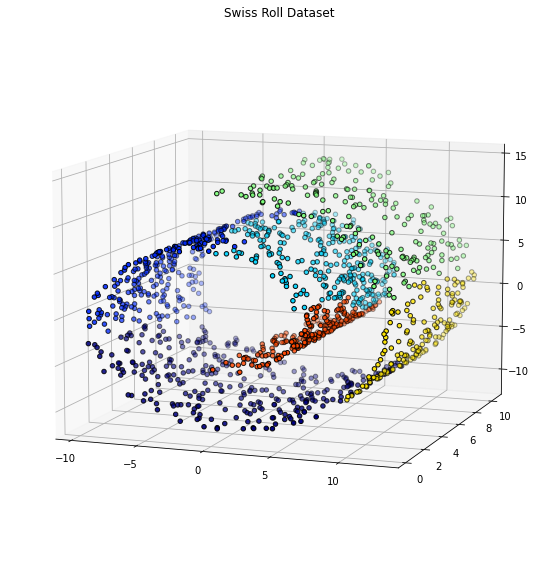

In [21]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined above
# to visualise your results, you don't have to redefine it.

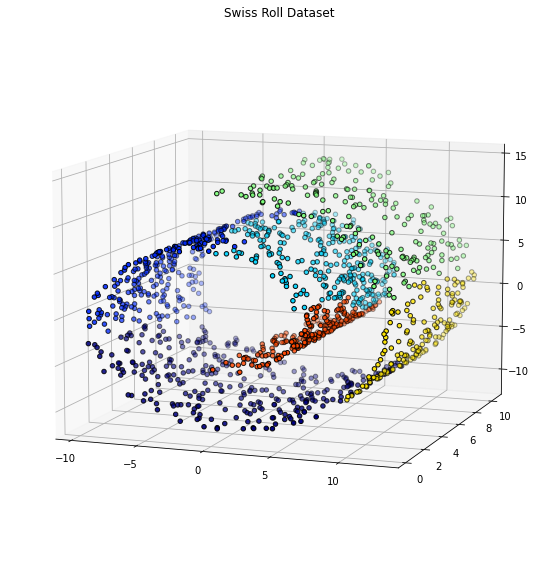

In [22]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined above
# to visualise your results, you don't have to redefine it.

# part 3 -- Compare Linkages

In the first part of the lab, you've seen that the linkages provide different ways to interpret the structure of the dataset. Let's explore this with more detail in 2D. In this part, you should identify which linkages are better for a different structures of data in 2D.

As I did in Part 1, I provide a function to plot the clusters. This time, you have to provide the title of the plot. I encourage you to change the parameters that generate the toy datasets, and explore the [datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets) documentation to if you want to explore with further datasets provided by scikit-learn. Here, we explore 4 toy datasets:

* **Circles:** 2 concentric circles. We would like to see datapoints in each circle assigned to the same cluster
* **Two moons:** 2 half moons placed with one end into the opening of the other. We would like to see datapoints in each moon assigned to the same cluster.
* **Separated Blobs of datapoints:** We would like to see datapoints in each blob asssigned to the same cluster.
* **Separated Blobs of datapoints with different variance:** We would like to see datapoints in each blob asssigned to the same cluster

TIPS:
* some of the generated datasets have different number of clusters, be sure to take that into account when fitting the data
* For easier parameter selection, it's often a good idea to normalise the dataset, have a look at the [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

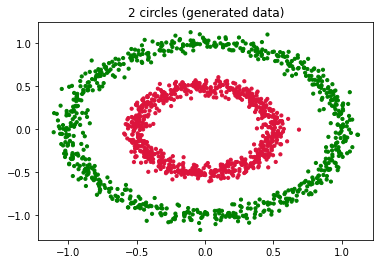

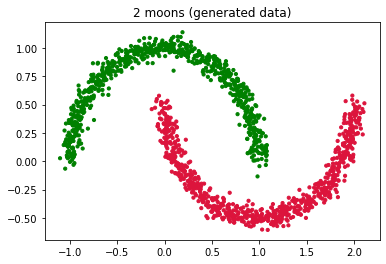

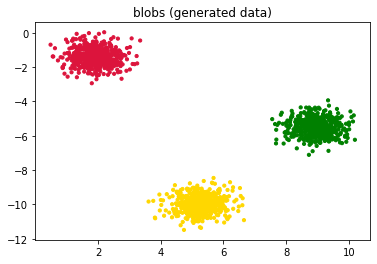

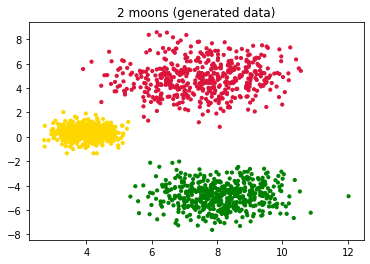

In [23]:
from sklearn import datasets
from itertools import cycle, islice

circles_points, circles_labels = datasets.make_circles(n_samples=1500, factor=0.5, noise=.05)
two_moons_points, two_moons_labels = datasets.make_moons(n_samples=1500, noise=.05)
blobs_points, blobs_labels = datasets.make_blobs(n_samples=n_samples, 
                                                 cluster_std=[.5, .5, .5],
                                                 random_state=200)
varied_points, varied_labels = datasets.make_blobs(n_samples=n_samples,
                                                   cluster_std=[1.0, 1.3, 0.5],
                                                   random_state=150)
def plot_clusters(X, labels=None, title=''):
    palette = ['green', 'crimson', 'gold', 'steelblue', 'orange']
    if labels is None:
        labels = [0] * X.shape[0]
        colors = np.array(['red'] * X.shape[0])
    else:
        colors = np.array(list(islice(cycle(palette), int(max(labels) + 1))))
    plt.figure()
    plt.scatter(X[:,0], X[:,1], s=10, color = colors[labels])
    plt.title(title)
    plt.show()

#visualise all the toy datasets
plot_clusters(circles_points, circles_labels, title='2 circles (generated data)')
plot_clusters(two_moons_points, two_moons_labels, title='2 moons (generated data)')
plot_clusters(blobs_points, blobs_labels, title='blobs (generated data)')
plot_clusters(varied_points, varied_labels, title='2 moons (generated data)')

### Exercise 3
Explore the impact of the different linkages in the 2 circles dataset and plot the results. Leave the linkage that appears to work the best as the first plot, followed by the remaining linkages to visualise the results.

For this case only, I provide a lot of the boilerplate code that will be useful for the next exercises.

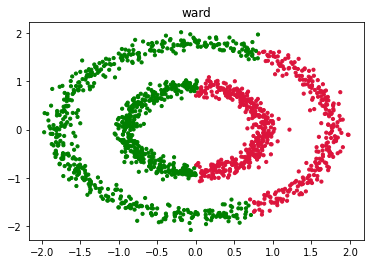

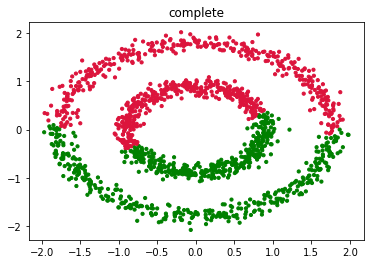

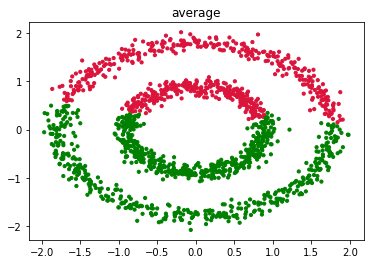

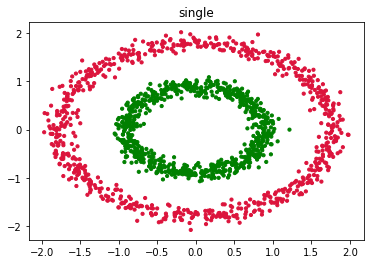

In [24]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined above
# to visualise your results, you don't have to redefine it.

### Exercise 4
Explore the impact of the different linkages in the 2 moons dataset and plot the results. Leave the linkage that appears to work the best as the first plot, followed by the remaining linkages to visualise the results.

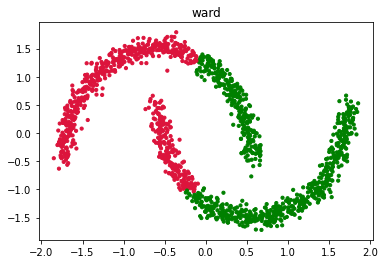

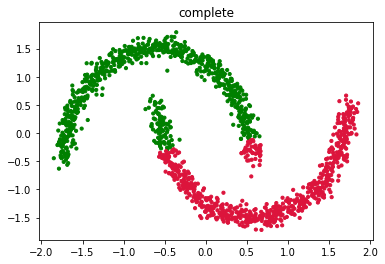

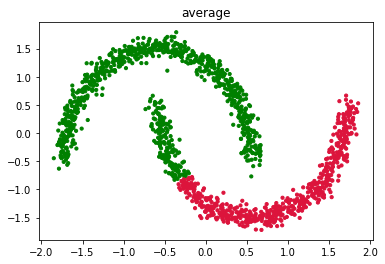

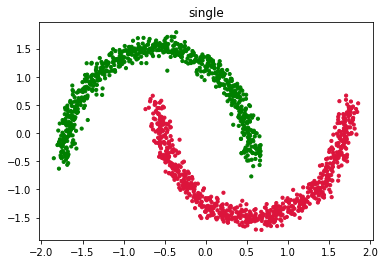

In [25]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined above
# to visualise your results, you don't have to redefine it.

### Exercise 5
Explore the impact of the different linkages in the separated blobs dataset and plot the results. Leave the linkage that appears to work the best as the first plot, followed by the remaining linkages to visualise the results.

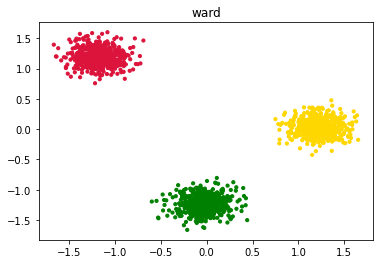

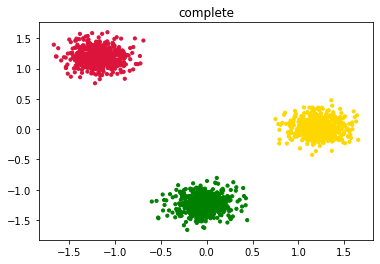

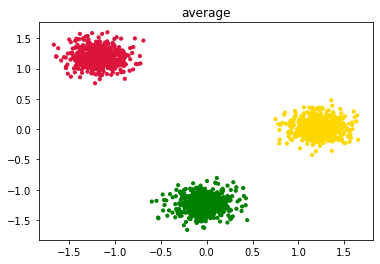

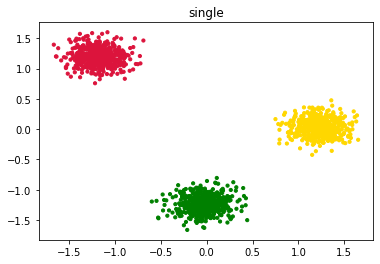

In [26]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined above
# to visualise your results, you don't have to redefine it.

### Exercise 6
Explore the impact of the different linkages in the separated blobs with different variance dataset and plot the results. Leave the linkage that appears to work the best as the first plot, followed by the remaining linkages to visualise the results.

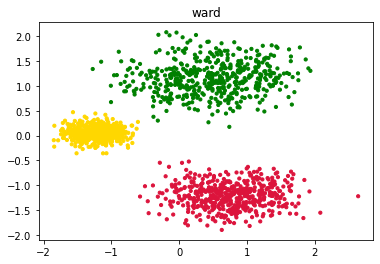

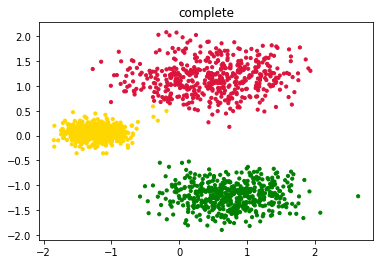

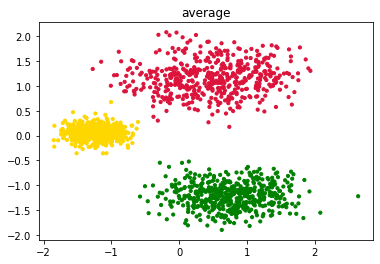

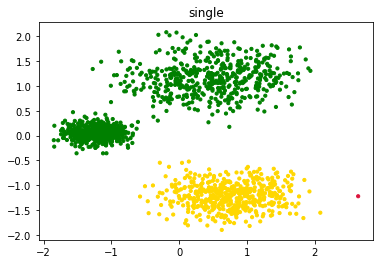

In [27]:
# Use this cell to write your code. 
# Remember that you can use the plot_clusters function defined above
# to visualise your results, you don't have to redefine it.